# Trabajo practico IV - Visión por computadora I

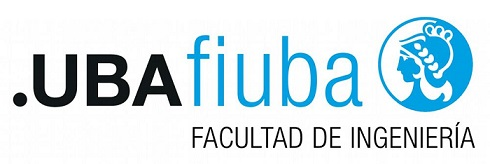

El objetivo de este trabajo práctico es aplicar los concpetos vistos en la clase 5 de la materia visión por computadora I de la Especialización en IA de la FIUBA

Primero cargaremos las libreriás necesarias para trabajar y luego se detalla cada parte y punto a analizar y trabajar, junto a las conclusiones obtenidas

## Cargamos las librerias necesarias

In [1]:
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import os

## Consignas:

Para las imagenes provsitas: 

1. Implementar un extractor de características LBP básico (sin uniformidad, 8 vecinos)
2. Realizar el histograma de características LBP de la imagen
3. Comparar los histogramas


#### Cargamos las imagenes a procesar y las mostramos

Cantidad de imagenes a analizar:  5 

Imagen  Imagen1.png
Tamaño de imagen:  (189, 190, 3)


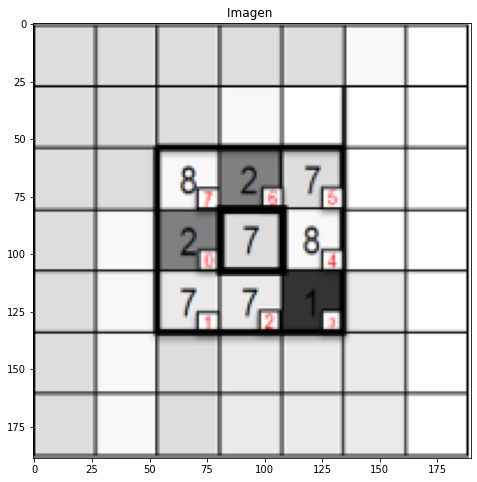



Imagen  Imagen2.png
Tamaño de imagen:  (188, 188, 3)


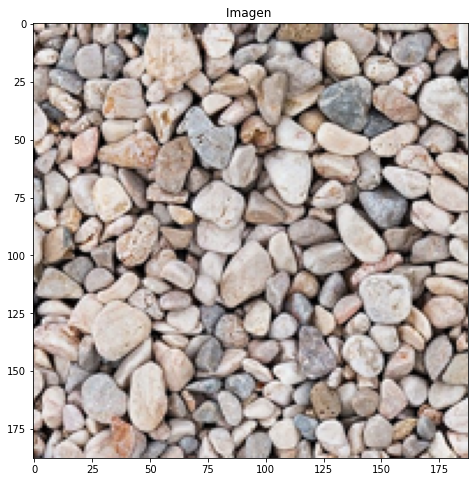



Imagen  Imagen3.png
Tamaño de imagen:  (189, 196, 3)


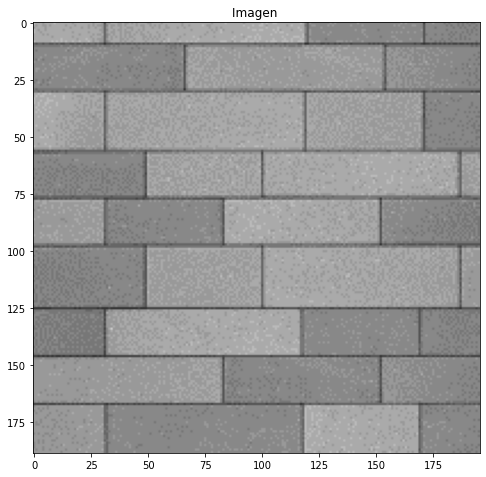



Imagen  Imagen4.png
Tamaño de imagen:  (189, 188, 3)


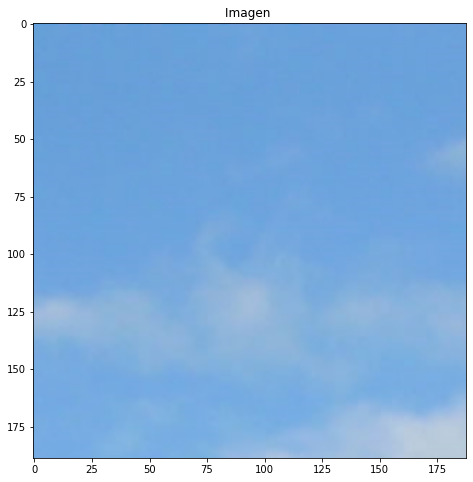



Imagen  Imagen5.png
Tamaño de imagen:  (190, 191, 3)


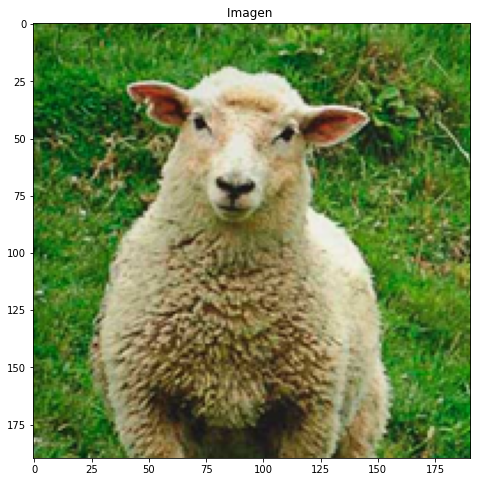

In [5]:
path_base = './imagenes'
imagenes_rutas  = os.listdir(path_base)
print("Cantidad de imagenes a analizar: ",len(imagenes_rutas),"\n")
for img_name in imagenes_rutas:
    img = cv.imread(path_base+"/"+img_name)
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    print("Imagen ",img_name)
    print("Tamaño de imagen: ", img.shape)   
    
    plt.figure(figsize=(8,8))
    plt.axis('off')
    plt.title("Imagen ")
    plt.imshow(img)
    plt.show()    
    print("\n") 

### 1. Implementar un extractor de características LBP básico (sin uniformidad, 8 vecinos)

In [36]:
def lbp(img:np.ndarray) -> np.ndarray: 
    alto = img.shape[0]
    ancho = img.shape[1]
    vector_pesos = np.array([1, 2, 4, 8, 16, 32, 64, 128])
    #vector_pesos = np.array([128,64,32,16,8,4,2,1])
    vector_pixel = np.zeros(8,dtype=np.uint8)
    img_salida = np.zeros((alto-2,ancho-2),dtype=np.uint8)
    for i in range(1,alto-1):
        for j in range(1,ancho-1):
            val_px_central = img[i][j]
            vector_pixel = np.array([img[i-1][j-1]>=val_px_central,
                                    img[i-1][j]>=val_px_central,
                                    img[i-1][j+1]>=val_px_central,
                                    img[i][j+1]>=val_px_central,
                                    img[i+1][j+1]>=val_px_central,
                                    img[i+1][j]>=val_px_central,
                                    img[i+1][j-1]>=val_px_central,
                                    img[i][j-1]>=val_px_central
                                    ])
            img_salida[i-1][j-1] = np.sum(vector_pixel*vector_pesos)
    
    return img_salida


### 2. Mostramos las imagenes procesadas con lbp y el histograma

Cantidad de imagenes a analizar:  5 



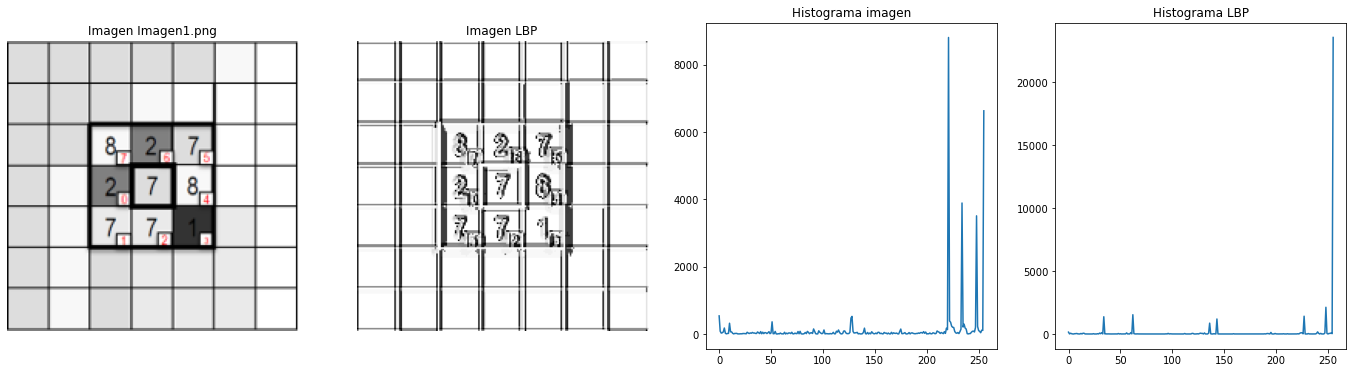

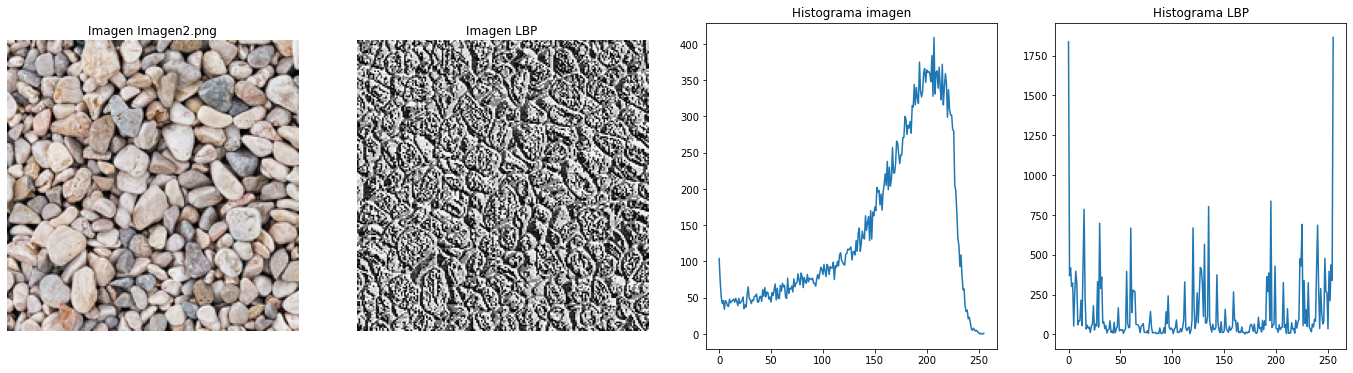

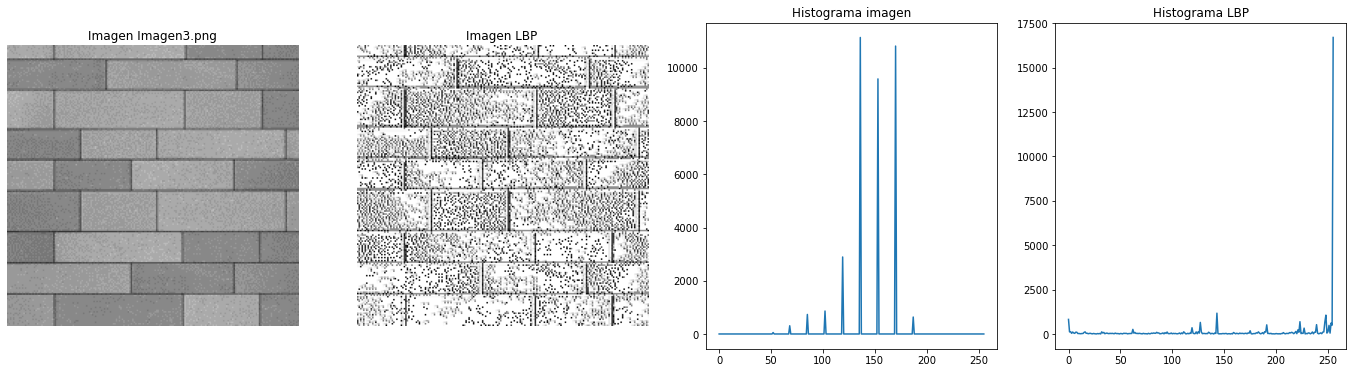

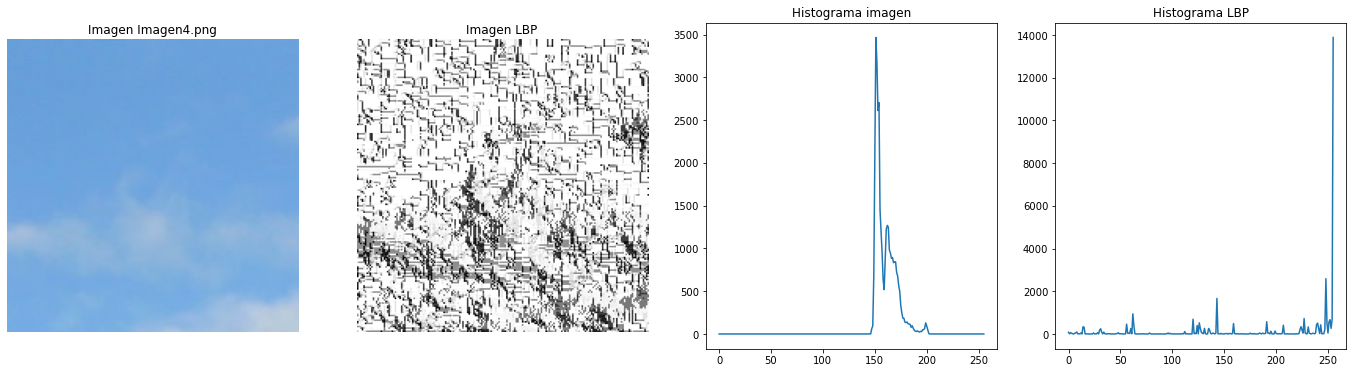

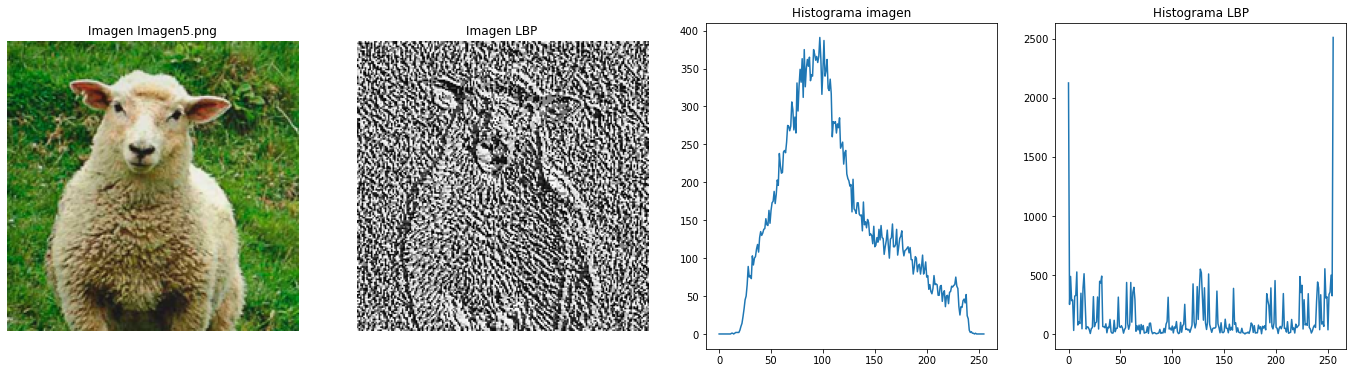

In [38]:
path_base = './imagenes'
imagenes_rutas  = os.listdir(path_base)
print("Cantidad de imagenes a analizar: ",len(imagenes_rutas),"\n")
for img_name in imagenes_rutas:
    img = cv.imread(path_base+"/"+img_name)
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    imagen_gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
    img_lbp = lbp(imagen_gray)
    
    plt.figure(figsize=(24,6))
    plt.subplot(1,4,1)
    plt.axis('off')
    plt.title("Imagen "+img_name)
    plt.imshow(img)
    plt.subplot(1,4,2)
    plt.axis('off')
    plt.title("Imagen LBP")
    plt.imshow(img_lbp,cmap='gray')
    
    hist,bins = np.histogram(imagen_gray.ravel(),256,[0,256])
    hist_lbp,bins1_lbp = np.histogram(img_lbp.ravel(),256,[0,256])
    
    plt.subplot(1,4,3)
    plt.title("Histograma imagen")
    plt.plot(hist)
    plt.subplot(1,4,4)
    plt.title("Histograma LBP")
    plt.plot(hist_lbp)
    
    plt.show()    
    print("\n") 
    
    
    
    #print(img_lbp.shape)
    #plt.figure(figsize=(20,8))
    #plt.axis('off')
    #plt.title("Imagen ")
    #plt.imshow(img_lbp,cmap='gray')
    
    
    
    
    plt.show()    
    print("\n") 

## Conclusiones y comparaciones de histogramas

* El histograma de las imagenes LBP están más distribuidos a lo largo de los diferentes bins, con algún pico puntual sobre el último bin
* Los histogramas con LBP de algunas imagenes son similares entre sí, aún cuando las imagenes son diferentes. Si bien en magnitud son diferentes, no lo son en distribución, con lo cual si se hace alguna normalización para compararlos algunas de las imagenes serían reconocidas como igual cuando no lo son. Para solucionar esto podemos usar la técnica vista en teoría de subdivisión de ventanas